# Лабораторная работа №2

Методы предсказания погоды

In [1]:
import pandas as pd
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%env SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True

env: SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True


In [22]:
# importing data
data = pd.read_csv('./data/seattle-weather.csv')

y = data['weather']
X = data.drop(['date', 'weather'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=400, shuffle=False)

pprint(X)
print(data.isnull().sum())

      precipitation  temp_max  temp_min  wind
0               0.0      12.8       5.0   4.7
1              10.9      10.6       2.8   4.5
2               0.8      11.7       7.2   2.3
3              20.3      12.2       5.6   4.7
4               1.3       8.9       2.8   6.1
...             ...       ...       ...   ...
1456            8.6       4.4       1.7   2.9
1457            1.5       5.0       1.7   1.3
1458            0.0       7.2       0.6   2.6
1459            0.0       5.6      -1.0   3.4
1460            0.0       5.6      -2.1   3.5

[1461 rows x 4 columns]
(400, 4)


# Dummy classifier. Example on seattle-weather.

In [7]:
from sklearn.dummy import DummyClassifier


dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)

rain    400
dtype: int64
Accuracy: 0.4025


,0,weather
0,rain,rain
1,rain,rain
2,rain,snow
3,rain,sun
4,rain,sun
...,...,...
395,rain,rain
396,rain,rain
397,rain,fog
398,rain,sun


# K-neighbours classifier. Example on seattle-weather.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)

sun     230
rain    170
dtype: int64
Accuracy: 0.7375


,0,weather
0,rain,rain
1,rain,rain
2,sun,snow
3,sun,sun
4,sun,sun
...,...,...
395,rain,rain
396,rain,rain
397,sun,fog
398,sun,sun


# GaussianNB. Example on seattle-weather.

In [17]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

print(pd.Series(y_pred).value_counts())  # mostly common variant
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)


sun        233
rain       157
snow         5
drizzle      5
dtype: int64
Accuracy: 0.8175


,0,weather
0,rain,rain
1,rain,rain
2,snow,snow
3,sun,sun
4,drizzle,sun
...,...,...
395,snow,rain
396,rain,rain
397,sun,fog
398,sun,sun


# Stochastic gradient descent (SGD). Example on seattle-weather.

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/linch-pc/Documents/HSE/3rd_Course/ML-seminar/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/linch-pc/Documents/HSE/3rd_Course/ML-seminar/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    0.6s remaining:    1.7s
/Users/linch-pc/Documents/HSE/3rd_Course/ML-seminar/venv/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnin

-------------SCORING MODELS-------------


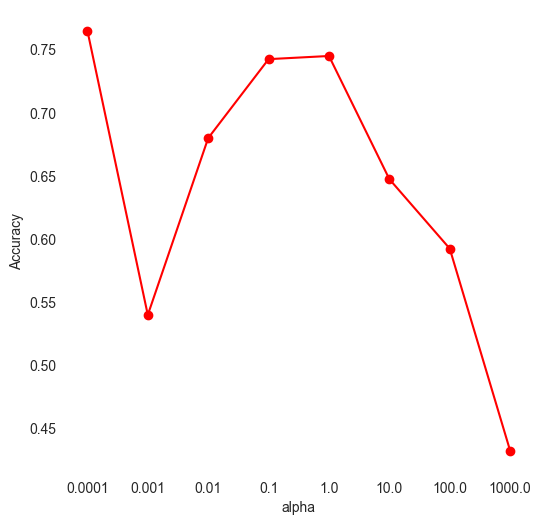

Best model & score from bestFit: SGDClassifier(loss='log', n_jobs=-1),

 0.765


,0,weather
0,rain,rain
1,rain,rain
2,rain,snow
3,sun,sun
4,sun,sun
...,...,...
395,rain,rain
396,rain,rain
397,sun,fog
398,sun,sun


In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf


sgd = SGDClassifier(n_jobs=-1)  # Run using all processors
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

#  Finding the optimal learning rate:
grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],  # learning rate // TODO: Change step's amount to make the purest result
    'loss': ['log'],  # logistic regression
    'penalty': ['l2'],  # L2 Regularization. Add a penalty to reduces the overfitting
    'n_jobs': [-1]  # Run using all processors
}

paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(
    SGDClassifier, paramGrid, X_train, y_train, X_test, y_test, 
    metric = accuracy_score, scoreLabel = "Accuracy")

print(f"Best model & score from bestFit: {bestModel},\n\n {bestScore}")
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)


# Gradient boosting, trees

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

gb_clf = GradientBoostingClassifier(
    max_depth=3, learning_rate=0.1, n_estimators=40
  )
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print(f"Gradient Boosting accuracy: {accuracy_score(y_test, y_pred)}")

des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)
y_pred = des_tree.predict(X_test)
print(f"Decision tree accuracy: {accuracy_score(y_test, y_pred)}")

rf_clf = RandomForestClassifier(n_jobs=-1, )
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Random forest accuracy: {accuracy_score(y_test, y_pred)}")

bg_clf = BaggingClassifier(n_jobs=-1)
bg_clf.fit(X_train, y_train)
y_pred = bg_clf.predict(X_test)
print(f"Bagging accuracy: {accuracy_score(y_test, y_pred)}")

Gradient Boosting accuracy: 0.8275
Decision tree accuracy: 0.76
Random forest accuracy: 0.83
Bagging accuracy: 0.7925


# SVM-method. Weather-example

In [19]:
from sklearn import svm

clf = svm.SVC(C=3.2, kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.83


# CatBoosting. Weather-example

In [16]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()

clf.fit(X_train, y_train)
clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Learning rate set to 0.079366
0:	learn: 1.4122417	total: 1.03ms	remaining: 1.03s
1:	learn: 1.2784208	total: 1.83ms	remaining: 913ms
2:	learn: 1.1726696	total: 2.55ms	remaining: 847ms
3:	learn: 1.0851788	total: 3.03ms	remaining: 755ms
4:	learn: 1.0131996	total: 3.69ms	remaining: 734ms
5:	learn: 0.9534646	total: 4.38ms	remaining: 725ms
6:	learn: 0.9018022	total: 5.06ms	remaining: 718ms
7:	learn: 0.8557928	total: 5.72ms	remaining: 709ms
8:	learn: 0.8190968	total: 6.3ms	remaining: 694ms
9:	learn: 0.7846693	total: 6.88ms	remaining: 681ms
10:	learn: 0.7558317	total: 7.56ms	remaining: 680ms
11:	learn: 0.7305880	total: 8.24ms	remaining: 679ms
12:	learn: 0.7053779	total: 8.92ms	remaining: 677ms
13:	learn: 0.6858238	total: 9.5ms	remaining: 669ms
14:	learn: 0.6674960	total: 10.1ms	remaining: 662ms
15:	learn: 0.6489929	total: 10.7ms	remaining: 655ms
16:	learn: 0.6318614	total: 11.2ms	remaining: 650ms
17:	learn: 0.6179039	total: 11.8ms	remaining: 644ms
18:	learn: 0.6041039	total: 12.4ms	remaining: 